# Example for iharp-Polaris package (04/29)

## 0. Install the package

In [1]:
!! pip install iharp-query-executor

['Requirement already satisfied: iharp-query-executor in ./venv/lib/python3.13/site-packages (0.1.1)',
 'Requirement already satisfied: xarray in ./venv/lib/python3.13/site-packages (from iharp-query-executor) (2025.3.1)',
 'Requirement already satisfied: numpy in ./venv/lib/python3.13/site-packages (from iharp-query-executor) (2.2.5)',
 'Requirement already satisfied: shapely in ./venv/lib/python3.13/site-packages (from iharp-query-executor) (2.1.0)',
 'Requirement already satisfied: matplotlib in ./venv/lib/python3.13/site-packages (from iharp-query-executor) (3.10.1)',
 'Requirement already satisfied: geopandas in ./venv/lib/python3.13/site-packages (from iharp-query-executor) (1.0.1)',
 'Requirement already satisfied: requests in ./venv/lib/python3.13/site-packages (from iharp-query-executor) (2.32.3)',
 'Requirement already satisfied: pyogrio>=0.7.2 in ./venv/lib/python3.13/site-packages (from geopandas->iharp-query-executor) (0.10.0)',
 'Requirement already satisfied: packaging i

## 1. Get an Xarray dataset of an ERA5 variable

In [2]:
from iharp_query_executor.get_raster_api import GetRasterExecutor

exec = GetRasterExecutor(
    variable="2m_temperature",
    start_datetime="2020-01-01 00:00:00",
    end_datetime="2023-12-31 23:00:00",
    temporal_resolution="year",
    min_lat=59,
    max_lat=84,
    min_lon=-74,
    max_lon=-10,
    spatial_resolution=0.25,
    aggregation="mean",
)

raster = exec.execute()

raster

/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<xarray.Dataset> Size: 418kB
Dimensions:     (valid_time: 4, latitude: 101, longitude: 257)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 808B 84.0 83.75 83.5 ... 59.5 59.25 59.0
  * longitude   (longitude) float64 2kB -74.0 -73.75 -73.5 ... -10.25 -10.0
  * valid_time  (valid_time) datetime64[ns] 32B 2020-12-31 ... 2023-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 415kB 258.5 ... 283.1
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-06T19:22 GRIB to CDM+CF via cfgrib-0.9.1...

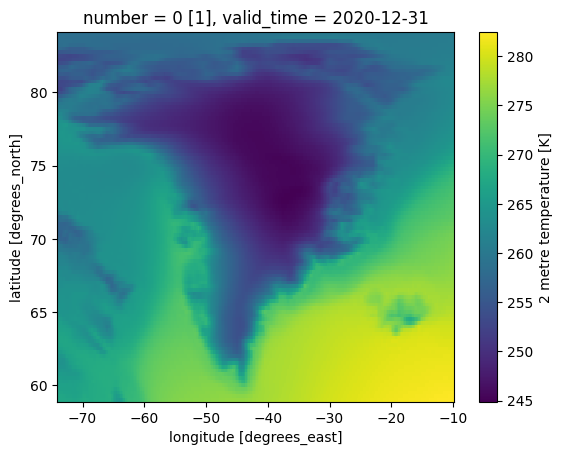

In [3]:
# visualize the raster
raster['t2m'].isel(valid_time=0).plot()

## 2. Aggregate variable to a heatmap 

In [4]:
from iharp_query_executor.get_heatmap_api import GetHeatmapExecutor

heatmap = GetHeatmapExecutor(
    variable="2m_temperature",
    start_datetime="2020-01-01 00:00:00",
    end_datetime="2023-12-31 23:00:00",
    min_lat=59,
    max_lat=84,
    min_lon=-74,
    max_lon=-10,
    spatial_resolution=0.25,
    aggregation="mean",
).execute()
heatmap

/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<xarray.Dataset> Size: 211kB
Dimensions:    (latitude: 101, longitude: 257)
Coordinates:
    number     int64 8B 0
  * latitude   (latitude) float64 808B 84.0 83.75 83.5 83.25 ... 59.5 59.25 59.0
  * longitude  (longitude) float64 2kB -74.0 -73.75 -73.5 ... -10.5 -10.25 -10.0
Data variables:
    t2m        (latitude, longitude) float64 208kB 258.4 258.4 ... 282.8 282.8

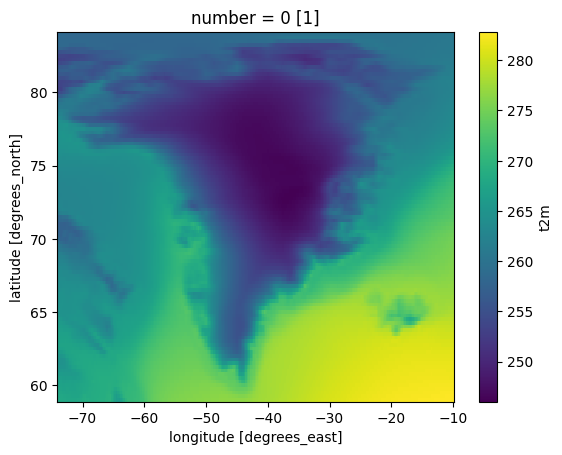

In [5]:
heatmap['t2m'].plot()

## 3. Aggregate variable to a timeseries

In [6]:
from iharp_query_executor.get_timeseries_api import GetTimeseriesExecutor

timeseries = GetTimeseriesExecutor(
    variable="2m_temperature",
    start_datetime="2020-01-01 00:00:00",
    end_datetime="2023-12-31 23:00:00",
    temporal_resolution="month",
    min_lat=59,
    max_lat=84,
    min_lon=-74,
    max_lon=-10,
    aggregation="mean",
).execute()
timeseries

/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<xarray.Dataset> Size: 584B
Dimensions:     (valid_time: 48)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 384B 2020-01-31 ... 2023-12-31
Data variables:
    t2m         (valid_time) float32 192B 252.4 250.8 251.9 ... 260.4 256.1

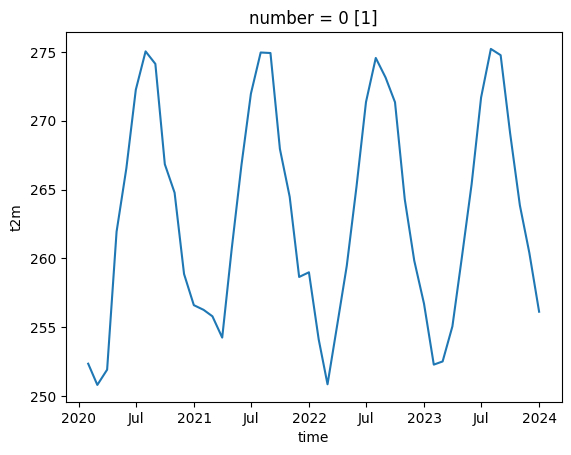

In [7]:
timeseries['t2m'].plot()

## 4. Find area with a filter on variable

In [8]:
from iharp_query_executor.get_find_area_api import GetFindAreaExecutor

area = GetFindAreaExecutor(
    variable="2m_temperature",
    start_datetime="2020-01-01 00:00:00",
    end_datetime="2023-12-31 23:00:00",
    min_lat=59,
    max_lat=84,
    min_lon=-74,
    max_lon=-10,
    spatial_resolution=0.25,
    aggregation="mean",
    filter_predicate=">",
    filter_value=260,
).execute()
area
    

/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<xarray.Dataset> Size: 29kB
Dimensions:    (latitude: 101, longitude: 257)
Coordinates:
    number     int64 8B 0
  * latitude   (latitude) float64 808B 84.0 83.75 83.5 83.25 ... 59.5 59.25 59.0
  * longitude  (longitude) float64 2kB -74.0 -73.75 -73.5 ... -10.5 -10.25 -10.0
Data variables:
    t2m        (latitude, longitude) bool 26kB False False False ... True True

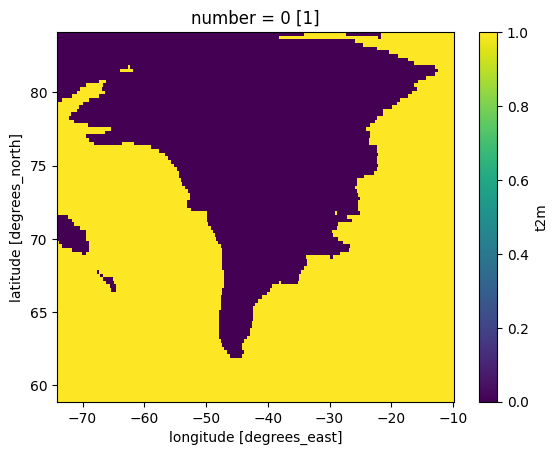

In [9]:
area['t2m'].plot()

## 5. Find time with a filter on variable

In [10]:
from iharp_query_executor.get_find_time_api import GetFindTimeExecutor

time = GetFindTimeExecutor(
    variable="2m_temperature",
    start_datetime="2020-01-01 00:00:00",
    end_datetime="2023-12-31 23:00:00",
    temporal_resolution="month",
    min_lat=59,
    max_lat=84,
    min_lon=-74,
    max_lon=-10,
    aggregation="mean",
    filter_predicate=">",
    filter_value=260
).execute()
time

/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<xarray.Dataset> Size: 440B
Dimensions:     (valid_time: 48)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 384B 2020-01-31 ... 2023-12-31
Data variables:
    t2m         (valid_time) bool 48B False False False True ... True True False

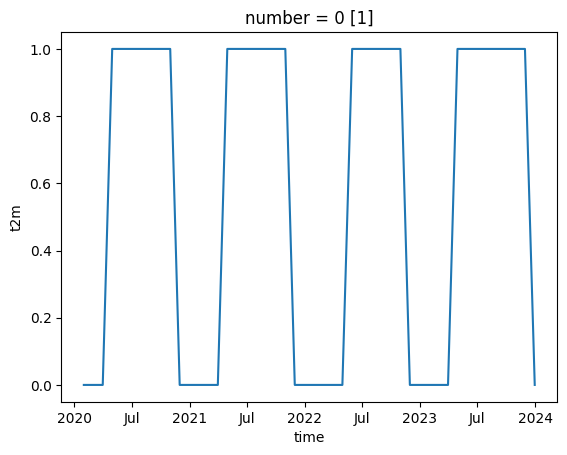

In [11]:
time['t2m'].plot()

## 6. Get variable with a GepJSON shape

In [12]:
from iharp_query_executor.get_geojson_executor import GeoJsonExecutor

geojson_masked_raster = GeoJsonExecutor(
    variable="2m_temperature",
    start_datetime="2020-01-01 00:00:00",
    end_datetime="2023-12-31 23:00:00",
    temporal_resolution="year",
    min_lat=59,
    max_lat=84,
    min_lon=-74,
    max_lon=-10,
    spatial_resolution=0.25,
    aggregation="mean",
    geojson_file="data/tri.geojson",
).execute()

geojson_masked_raster

Mask Succeeded: Reduced from 8484 to 3724 points


/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<xarray.Dataset> Size: 35kB
Dimensions:     (valid_time: 4, latitude: 21, longitude: 101)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 168B 80.0 79.75 79.5 ... 75.5 75.25 75.0
  * longitude   (longitude) float64 808B -50.0 -49.75 -49.5 ... -25.25 -25.0
  * valid_time  (valid_time) datetime64[ns] 32B 2020-12-31 ... 2023-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 34kB nan nan ... nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-06T19:22 GRIB to CDM+CF via cfgrib-0.9.1...

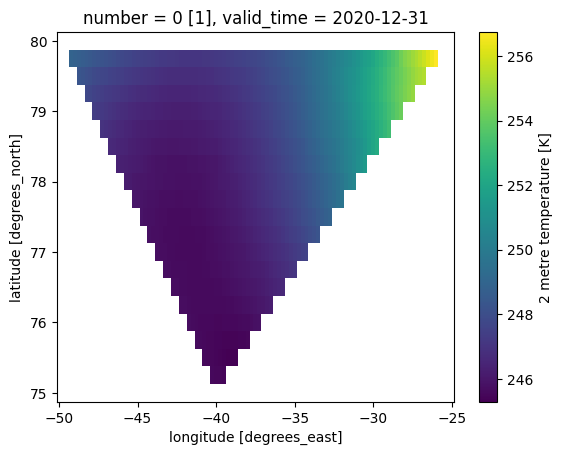

In [13]:
# visualize the raster
geojson_masked_raster['t2m'].isel(valid_time=0).plot()

Mask Succeeded: Reduced from 2340 to 1236 points


/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


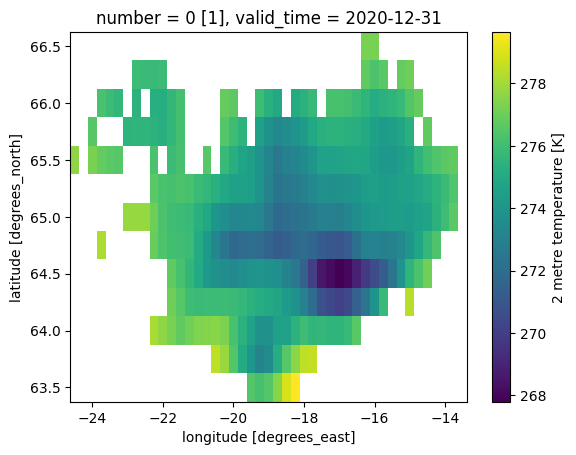

In [14]:
iceland = GeoJsonExecutor(
    variable="2m_temperature",
    start_datetime="2020-01-01 00:00:00",
    end_datetime="2023-12-31 23:00:00",
    temporal_resolution="year",
    min_lat=59,
    max_lat=84,
    min_lon=-74,
    max_lon=-10,
    spatial_resolution=0.25,
    aggregation="mean",
    geojson_file="data/iceland.geojson",
).execute()

iceland["t2m"].isel(valid_time=0).plot()

/Users/yuchuanhuang/Github/iharp-library-example/venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'iharpv-dev.cs.umn.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Mask Succeeded: Reduced from 92720 to 40848 points


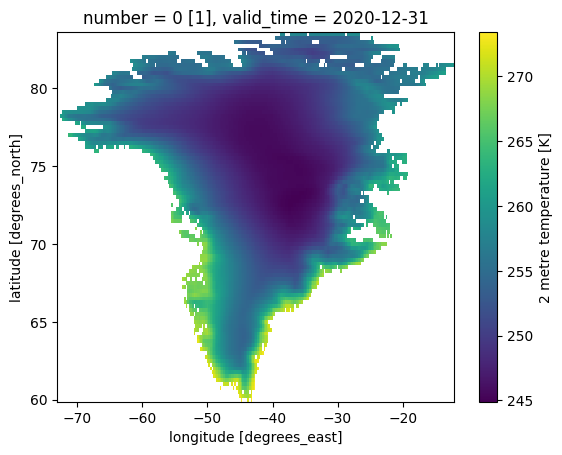

In [15]:
greenland = GeoJsonExecutor(
    variable="2m_temperature",
    start_datetime="2020-01-01 00:00:00",
    end_datetime="2023-12-31 23:00:00",
    temporal_resolution="year",
    min_lat=59,
    max_lat=84,
    min_lon=-74,
    max_lon=-10,
    spatial_resolution=0.25,
    aggregation="mean",
    geojson_file="data/greenland.geojson",
).execute()
greenland["t2m"].isel(valid_time=0).plot()